<IPython.core.display.Javascript object>


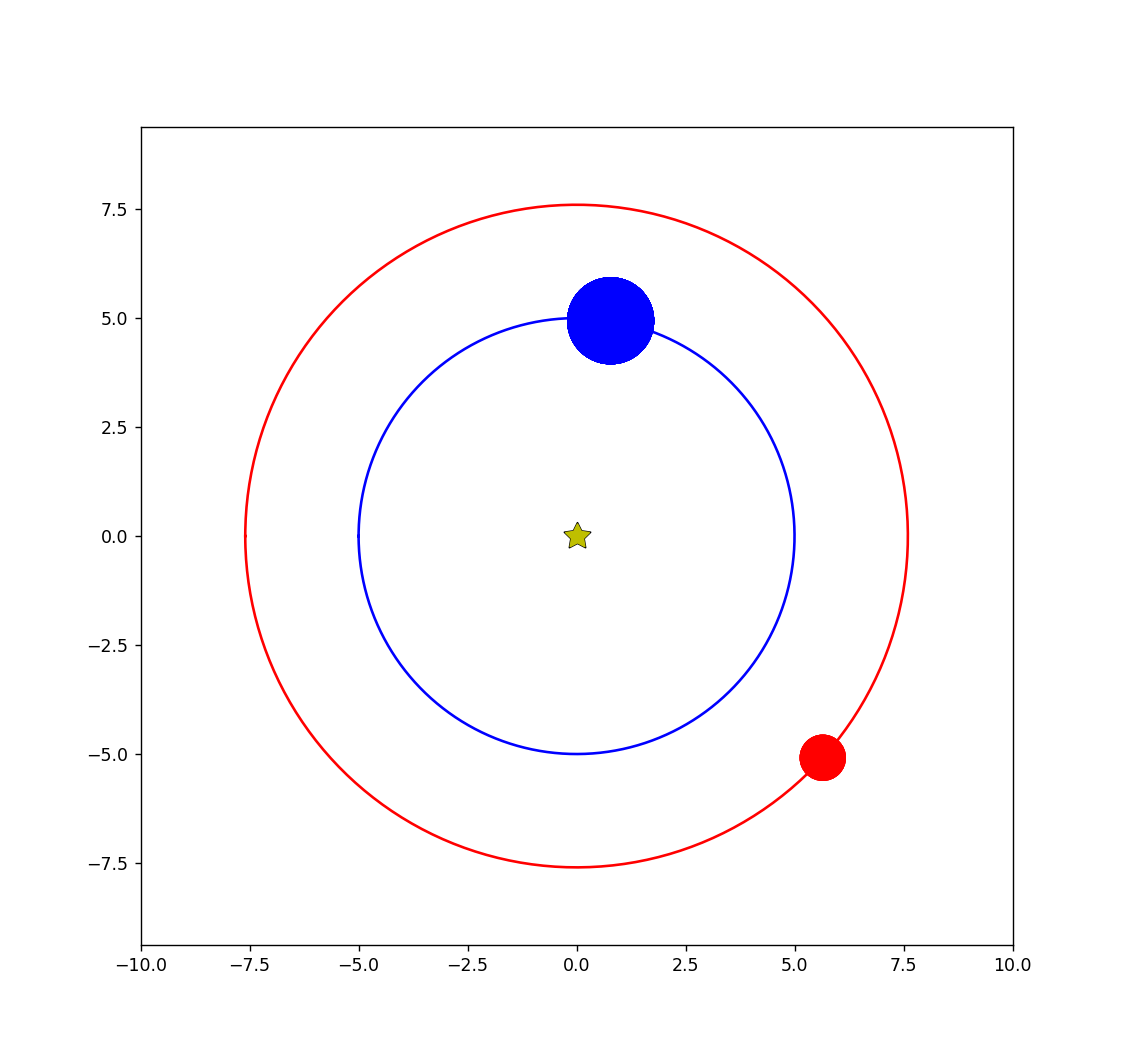

(-10, 10)

In [11]:
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
from matplotlib import animation


%matplotlib notebook

class ParallaxScene:
    """
    We'll treat the entire collection of the Earth/Sun, foreground
    star, and background star as an object.  The only real thing that we
    need to change from frame to frame is the location of Earth
    """

    def __init__(self):

        # start Earth on the x-axis, on the opposite side of the field of
        # stars we will reference -- we accomplish this through a phase
        self.phi = math.pi
        
        # number of steps per year (make this a number divisible by 4)
        self.nsteps_year = 360   

        # angular velocity (radians per year)
        self.omega = 2.0*math.pi/1.0          

        # semi-major axis of planet Earth
        self.a_E = 5.0       

         # semi-major axis of planet Mars
        self.a_E1 = 7.6
        
        # position of Earth over the year
        omega_t = np.arange(self.nsteps_year)*2.0*math.pi/(self.nsteps_year-1)
        self.x_orbit = self.a_E*np.cos(omega_t + self.phi)
        self.y_orbit = self.a_E*np.sin(omega_t + self.phi)

        # position of Mars over the year
        self.x_orbit1 = self.a_E1*np.cos(omega_t + self.phi)
        self.y_orbit1 = self.a_E1*np.sin(omega_t + self.phi)
        
        # foreground star
        self.x_fg = 1.5
        self.y_fg = 0.0


    def draw_sun_and_orbit(self):

        # draw the Sun
        plt.scatter([0], [0], s=250, marker=(5,1), color="k")
        plt.scatter([0], [0], s=200, marker=(5,1), color="y")

        # plot the orbit
        plt.plot(self.x_orbit, self.y_orbit, "b")
        plt.plot(self.x_orbit1, self.y_orbit1, "r")





A=ParallaxScene()


fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(9, 8.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 1.0, fc='b')


    
def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

def animate(i):
    x, y = patch.center
    x = 0 + 5 * np.sin(np.radians(i)*1.0)
    y = 0 + 5 * np.cos(np.radians(i)*1.0)
    patch.center = (x, y)
    return patch,



anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=360, 
                               interval=10,
                               blit=True)

patch2 = plt.Circle((5, -5), 0.5326, fc='r')


    
def init2():
    patch2.center = (5, 5)
    ax.add_patch(patch2)
    return patch2,

def animate2(i):
    v, w = patch2.center
    v = 0 + 7.6 * np.sin(np.radians(i)*0.80) 
    w = 0 + 7.6 * np.cos(np.radians(i)*0.80)
    patch2.center = (v, w)
    return patch2,



anim2 = animation.FuncAnimation(fig, animate2, 
                               init_func=init2, 
                               frames=1800, 
                               interval=10,
                               blit=True)





A.draw_sun_and_orbit()
plt.show()
axis("equal")
xlim(-10,10)
ylim(-10,10)


